# Midterm test - Computer Statistics - Nguyen Van Minh - 22003405

## Phân tích dữ liệu doanh số Black Friday

Tập dữ liệu sử dụng trong bài kiểm tra này được cung cấp trong file black_friday.csv. Đây là dữ liệu về giao dịch mua sắm trong sự kiện Black Friday, bao gồm thông tin khách hàng, sản phẩm và số tiền chi tiêu. Anh/chị được yêu cầu thực hiện các công việc dưới đây.

Yêu cầu:

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1 .Đọc file dữ liệu và hiển thị 5 dòng đầu tiên.
df = pd.read_csv('black_friday.csv')
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# 2 .Tập dữ liệu có bao nhiêu dòng và bao nhiêu cột? 
#   .Có bao nhiêu giá trị bị thiếu trong từng cột?
print(df.shape)
print('*'*50)
print(df.isnull().sum())

(550068, 12)
**************************************************
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [5]:
# 3 .Liệt kê danh sách các thuộc tính định tính và định lượng trong tập dữ liệu.
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Danh sách các thuộc tính định tính:")
print(categorical_columns)

print("*"*50)

print("danh sách các thuộc tính định lượng:")
print(numerical_columns)

Danh sách các thuộc tính định tính:
['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
**************************************************
danh sách các thuộc tính định lượng:
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


In [6]:
# 4 .Có bao nhiêu loại sản phẩm khác nhau?
num_products = df['Product_ID'].nunique()
print(f'Có {num_products} loại sản phẩm khác nhau')

#   .Sản phẩm nào được mua nhiều nhất?
product_purchased_most = df['Product_ID'].value_counts().idxmax()
count_purchased_most = df['Product_ID'].value_counts().max()
print(f'Sản phẩm có mã {product_purchased_most} được mua nhiều nhất là: {count_purchased_most}')

Có 3631 loại sản phẩm khác nhau
Sản phẩm có mã P00265242 được mua nhiều nhất là: 1880


Tỷ lệ nam trong tập dữ liệu là: 75.31%
Tỷ lệ nữ trong tập dữ liệu là: 24.69%
**************************************************


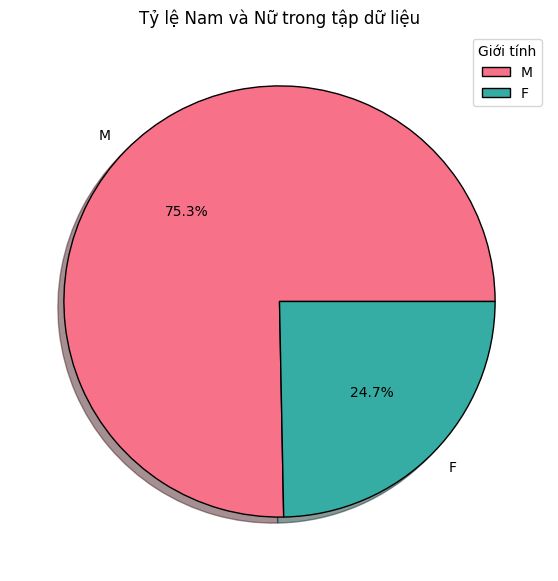

In [7]:
# 5 .Tỷ lệ nam và nữ trong tập dữ liệu là bao nhiêu?
male_ratio, famale_ratio = df['Gender'].value_counts(normalize=True) * 100
print(f'Tỷ lệ nam trong tập dữ liệu là: {male_ratio:.2f}%')
print(f'Tỷ lệ nữ trong tập dữ liệu là: {famale_ratio:.2f}%')
print('*'*50)
#   .Chọn biểu đồ phù hợp để trực quan hóa.
gender_ratio = df['Gender'].value_counts(normalize=True)
colors = sns.color_palette("husl", len(gender_ratio))
explode = [0.05, 0]
plt.figure(figsize=(7, 7))

plt.pie(
    x = gender_ratio,
    labels=gender_ratio.index,
    autopct='%1.1f%%',
    colors=colors,
    shadow=True,
    # explode=explode,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Tỷ lệ Nam và Nữ trong tập dữ liệu")
plt.legend(title="Giới tính", loc="upper right")
plt.show()

Hiển thị nhóm khách hàng thuộc các độ tuổi ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
**************************************************
Nhóm khách hàng thuộc độ tuổi 51-55 có mức chi tiêu trung bình cao nhất là: 9535


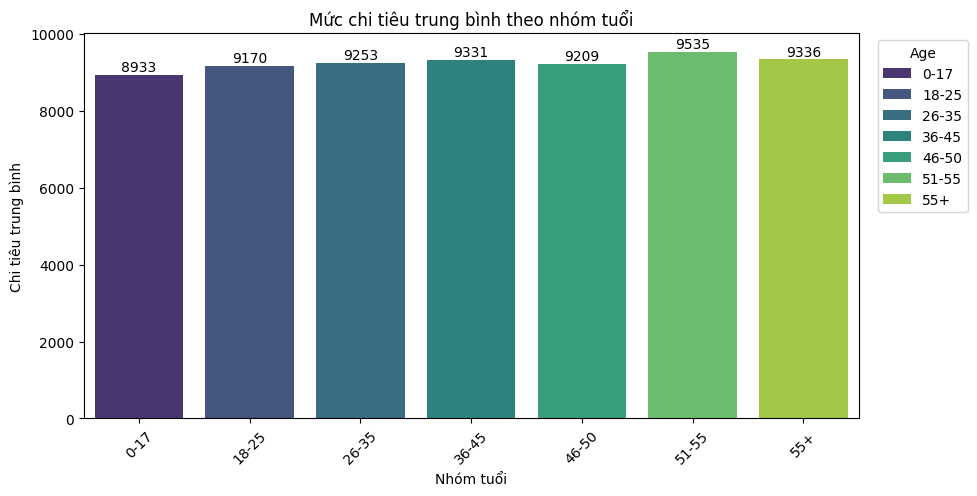

In [8]:
# 6 .Nhóm khách hàng thuộc độ tuổi nào có mức chi tiêu trung bình cao nhất?
print('Hiển thị nhóm khách hàng thuộc các độ tuổi', df['Age'].unique()) # Sort giảm dần nếu cần @.sort_values(ascending=False)@
print('*'*50)
age_spending = df.groupby('Age')['Purchase'].mean()
print(f'Nhóm khách hàng thuộc độ tuổi {age_spending.idxmax()} có mức chi tiêu trung bình cao nhất là: {age_spending.max():.0f}')

# Bổ sung nếu cần vẽ thêm biểu đồ ~.~ (Đề bài này không yêu cầu)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=age_spending.index,
    y=age_spending.values,
    hue=age_spending.index,
    palette="viridis",
    legend=True
)

plt.xlabel("Nhóm tuổi")
plt.ylabel("Chi tiêu trung bình")
plt.title("Mức chi tiêu trung bình theo nhóm tuổi")
plt.legend(title="Age", bbox_to_anchor=(1.15, 1), loc='upper right') # dieu chinh 1.15 de di chuyen qua phải
plt.xticks(rotation=45)

# Hiển thị giá trị tên từng cột
for i, value in enumerate(age_spending.values):
    plt.text(i, value + 100, f'{value:.0f}', ha='center')

plt.show()

In [9]:
# 7 .Tính các đại lượng thống kê như giá trị trung bình, trung vị, độ lệch chuẩn của mức chi tiêu.
mean_value = df['Purchase'].mean()
median_value = df['Purchase'].median()
std_value = df['Purchase'].std()
print(f'Giá trị trung bình: {mean_value:.2f}')
print(f'Giá trị trung vị: {median_value:.2f}')
print(f'Độ lệch chuẩn: {std_value:.2f}')
print('*'*50)
# Hiển Thị Toàn Bộ Thống Kê
df['Purchase'].describe()

Giá trị trung bình: 9263.97
Giá trị trung vị: 8047.00
Độ lệch chuẩn: 5023.07
**************************************************


count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

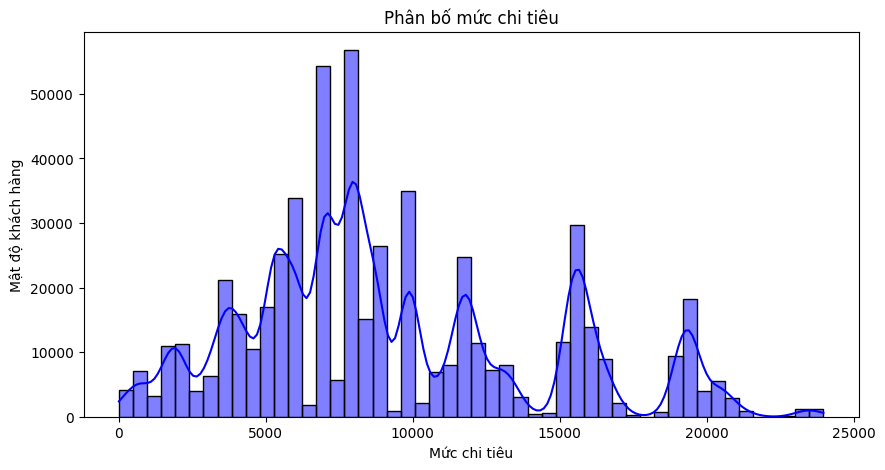

' *** Nhận xét về xu hướng *** \n    \n    Phân bố mức chi tiêu lệch phải mạnh, tập trung chủ yếu ở khoảng 0–5,000 (đa số khách hàng chi tiêu thấp).\n    Một số ít giao dịch cao bất thường (ví dụ: 15,200) kéo dài đuôi phân phối. Xu hướng này phản ánh nhóm khách\n    hàng đại chúng chi tiêu thấp, kèm theo tiềm năng khai thác từ nhóm chi tiêu cao. Doanh nghiệp nên cân bằng chiến\n    lược để phục vụ cả hai đối tượng.\n    \n'

In [10]:
# 8 .Chọn loại đồ thị phù hợp để hiển thị `sự phân bố chi tiêu` và nhận xét về xu hướng.

# Dùng histogram
plt.figure(figsize=(10, 5))
sns.histplot(
    df['Purchase'],
    bins=50,
    color='blue',
    alpha=0.5,
    kde=True,
)

plt.title("Phân bố mức chi tiêu")
plt.xlabel("Mức chi tiêu")
plt.ylabel("Mật độ khách hàng")
plt.show()

""" *** Nhận xét về xu hướng *** 
    
    Phân bố mức chi tiêu lệch phải mạnh, tập trung chủ yếu ở khoảng 0–5,000 (đa số khách hàng chi tiêu thấp).
    Một số ít giao dịch cao bất thường (ví dụ: 15,200) kéo dài đuôi phân phối. Xu hướng này phản ánh nhóm khách
    hàng đại chúng chi tiêu thấp, kèm theo tiềm năng khai thác từ nhóm chi tiêu cao. Doanh nghiệp nên cân bằng chiến
    lược để phục vụ cả hai đối tượng.
    
"""

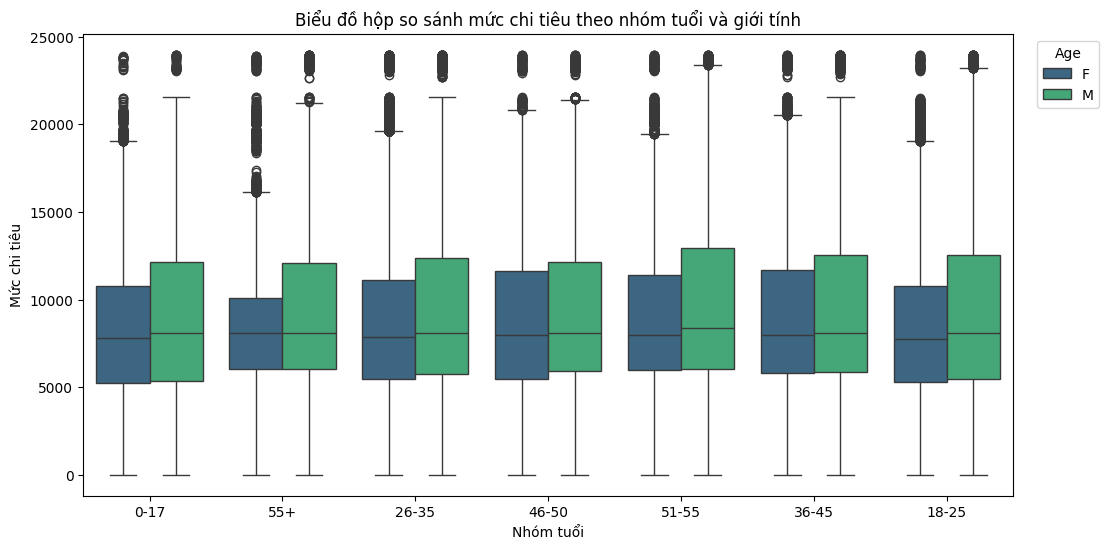

In [11]:
# 9 .Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Age", 
    y="Purchase", 
    data=df, 
    hue="Gender", 
    palette="viridis"
)

plt.title('Biểu đồ hộp so sánh mức chi tiêu theo nhóm tuổi và giới tính')
plt.xlabel("Nhóm tuổi")
plt.ylabel("Mức chi tiêu")
plt.legend(title="Age", bbox_to_anchor=(1.1, 1), loc='upper right')
plt.show()

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64
**************************************************


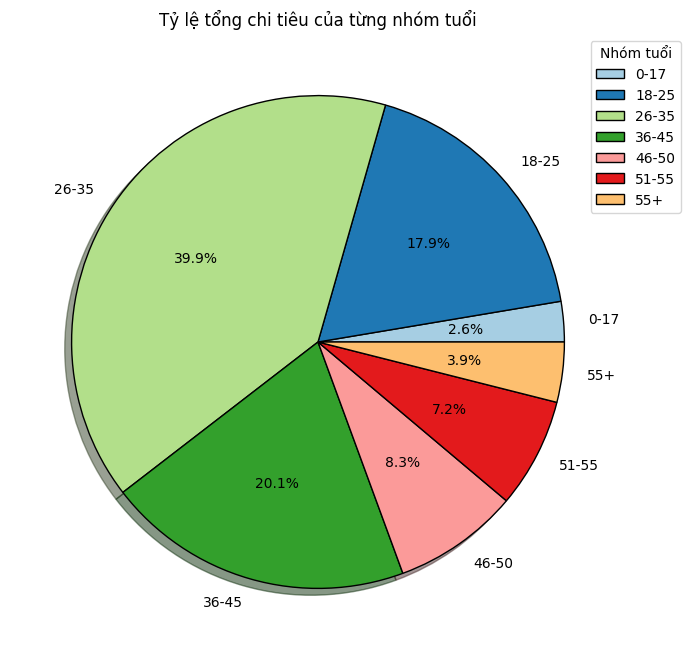

In [13]:
# 10.Biểu đồ tròn thể hiện tỷ lệ tổng chi tiêu của từng nhóm tuổi.
spending_age = df.groupby('Age')['Purchase'].sum()
print(spending_age)
print('*'*50)

plt.figure(figsize=(8,8))

plt.pie(
    x=spending_age,
    labels=spending_age.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    # startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.legend(title="Nhóm tuổi", bbox_to_anchor=(1.1, 1), loc="upper right")
plt.title("Tỷ lệ tổng chi tiêu của từng nhóm tuổi")
plt.show()